Import Library useful

In [161]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

#Imputation of missing values
from sklearn.impute import KNNImputer

#Preprocessing scaler, one-hot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Model
from sklearn.neural_network import MLPClassifier

# Metrics and graph
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

Import data and description

In [162]:
#data link https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29\n",
header_column = ["Status of existing checking account",
                "Duration in month",
                "Credit history",
                "Purpose",
                "Credit amount",
                "Savings account/bonds",
                "Present employment since",
                "Installment rate in percentage of disposable income",
                "Personal status and sex",
                "Other debtors / guarantors",
                "Present residence since",
                "Property",
                "Age in years",
                "Other installment plans",
                "Housing",
                "Number of existing credits at this bank",
                "Job",
                "Number of people being liable to provide maintenance for",
                "Telephone",
                "foreign worker",
                "actual classification"]
data = pd.read_csv("D:\Frong\Github\software development\SC348810-Software-Development-and-Project-Management-for-Data-Science-and-Artificial-Intelligence\data\german_data.txt", sep = " ", names = header_column)
df = pd.DataFrame(data = data)

#Check data
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,actual classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

Change object -> category

Change string to float

: Category dtype better than object when you train model.

In [164]:
#Change dtype object -> category
df_cat = df.copy()
for col_name in df_cat.columns:
    if np.dtype(df_cat[col_name]) == "object":
        df_cat[col_name] = df_cat[col_name].astype("category")
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Status of existing checking account                       1000 non-null   category
 1   Duration in month                                         1000 non-null   int64   
 2   Credit history                                            1000 non-null   category
 3   Purpose                                                   1000 non-null   category
 4   Credit amount                                             1000 non-null   int64   
 5   Savings account/bonds                                     1000 non-null   category
 6   Present employment since                                  1000 non-null   category
 7   Installment rate in percentage of disposable income       1000 non-null   int64   
 8   Personal 

***Actual class 

: 1 -> good

: 2 -> bad

Data management

In [165]:
#When you random value from library, A values will be same point at the different time.
SEED = 0 

#Define target and feature from dataframe.
TARGET = "actual classification"
FEATURES = df_cat.columns.drop(TARGET)

#Select data columns name only dtype 'number'
NUMERICAL = df_cat[FEATURES].select_dtypes('number').columns

#Select data coulumn name only dtype 'category'
CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL)) # np.setdiff1d(a, b) -> return unique values in a that b value not in a Ex. [1, 2, 3], [3, 4] => [1, 2]

#Change string to float
for column_name in df_cat[CATEGORICAL]:
    df_cat[column_name] = df_cat[column_name].cat.codes

input = df_cat.drop(columns=TARGET)
target = df_cat[TARGET]

Pipline

In [166]:
#Numerical_pipline
numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 7, weights = 'uniform')), #Method to solve missing values
    ('scaler', StandardScaler()) #Change scale on data
])

categorical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 7, weights = 'uniform')),
    ('encoder', OneHotEncoder())  #Extract data to one-hot to each columns
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

Multilayer Perceptron

In [167]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=.15, random_state=SEED, 
                                    stratify=df_cat[TARGET])

In [168]:
mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16,), random_state=SEED))
])

mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provid...
                                                  Index(['Credit history', 'Housing', 'Job', 'Other debtors / guarantors',
       'Other installment plans', 'Personal status and sex',
       'Present employment since', 'Property', 'Purpose',
       'Savings account/bonds', 'Status of existing checking account',
       'Telephone', 'foreign worker'],
      dtype='object'))])),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16,),
                               random_state=0, solver='lbfgs'))])

In [169]:
y_pred = mlp_pipeline.predict(X_test)
accuracy = mlp_pipeline.score(X_test, y_test)

print("accuracy: ",accuracy)
print("f1_score: ",f1_score(y_test, y_pred, average="weighted"))

accuracy:  0.7
f1_score:  0.6990255072155067


In [170]:
target_names = ['bad', 'good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.78      0.79      0.79       105
        good       0.50      0.49      0.49        45

    accuracy                           0.70       150
   macro avg       0.64      0.64      0.64       150
weighted avg       0.70      0.70      0.70       150



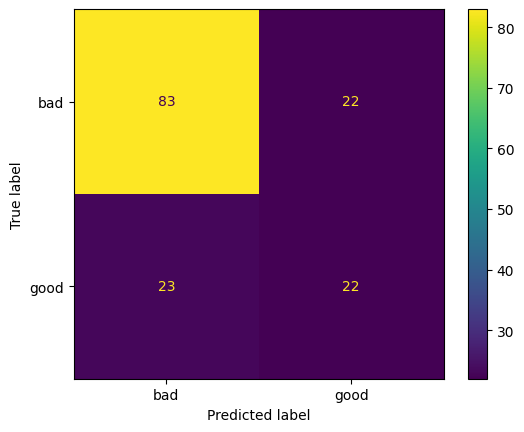

Total test data ->  150


In [171]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=target_names)
disp = disp.plot()
plt.show()
print("Total test data -> ", X_test.shape[0])

In [172]:
# # Change data to numerical

# for index, data in enumerate(df["Status of existing checking account"]):
#     if data == "A11":
#         df["Status of existing checking account"][index] = 1
#     elif data == "A12":
#         df["Status of existing checking account"][index] = 2
#     elif data == "A13":
#         df["Status of existing checking account"][index] = 3
#     elif data == "A14":
#         df["Status of existing checking account"][index] = 4
#     else:
#         continue

# for index, data in enumerate(df["Credit history"]):
#     if data == "A30":
#         df["Credit history"][index] = 1
#     elif data == "A31":
#         df["Credit history"][index] = 2
#     elif data == "A32":
#        df["Credit history"][index] = 3
#     elif data == "A33":
#         df["Credit history"][index] = 4
#     elif data == "A34":
#         df["Credit history"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Purpose"]):
#     if data == "A40":
#         df["Purpose"][index] = 1
#     elif data == "A41":
#         df["Purpose"][index] = 2
#     elif data == "A42":
#        df["Purpose"][index] = 3
#     elif data == "A43":
#         df["Purpose"][index] = 4
#     elif data == "A44":
#         df["Purpose"][index] = 5
#     elif data == "A45":
#         df["Purpose"][index] = 6
#     elif data == "A46":
#         df["Purpose"][index] = 7
#     elif data == "A47":
#         df["Purpose"][index] = 8
#     elif data == "A48":
#         df["Purpose"][index] = 9
#     elif data == "A49":
#         df["Purpose"][index] = 10
#     elif data == "A410":
#         df["Purpose"][index] = 11
#     else:
#         continue

# for index, data in enumerate(df["Savings account/bonds"]):
#     if data == "A61":
#         df["Savings account/bonds"][index] = 1
#     elif data == "A62":
#         df["Savings account/bonds"][index] = 2
#     elif data == "A63":
#        df["Savings account/bonds"][index] = 3
#     elif data == "A64":
#         df["Savings account/bonds"][index] = 4
#     elif data == "A65":
#         df["Savings account/bonds"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Present employment since"]):
#     if data == "A71":
#         df["Present employment since"][index] = 1
#     elif data == "A72":
#         df["Present employment since"][index] = 2
#     elif data == "A73":
#        df["Present employment since"][index] = 3
#     elif data == "A74":
#         df["Present employment since"][index] = 4
#     elif data == "A75":
#         df["Present employment since"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Personal status and sex"]):
#     if data == "A91":
#         df["Personal status and sex"][index] = 1
#     elif data == "A92":
#         df["Personal status and sex"][index] = 2
#     elif data == "A93":
#        df["Personal status and sex"][index] = 3
#     elif data == "A94":
#         df["Personal status and sex"][index] = 4
#     elif data == "A95":
#         df["Personal status and sex"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Other debtors / guarantors"]):
#     if data == "A101":
#         df["Other debtors / guarantors"][index] = 1
#     elif data == "A102":
#         df["Other debtors / guarantors"][index] = 2
#     elif data == "A103":
#        df["Other debtors / guarantors"][index] = 3
#     else:
#         continue

# for index, data in enumerate(df["Property"]):
#     if data == "A121":
#         df["Property"][index] = 1
#     elif data == "A122":
#         df["Property"][index] = 2
#     elif data == "A123":
#        df["Property"][index] = 3
#     elif data == "A124":
#        df["Property"][index] = 4
#     else:
#         continue

# for index, data in enumerate(df["Housing"]):
#     if data == "A151":
#         df["Housing"][index] = 1
#     elif data == "A152":
#         df["Housing"][index] = 2
#     elif data == "A153":
#        df["Housing"][index] = 3
#     else:
#         continue

# for index, data in enumerate(df["Job"]):
#     if data == "A171":
#         df["Job"][index] = 1
#     elif data == "A172":
#         df["Job"][index] = 2
#     elif data == "A173":
#        df["Job"][index] = 3
#     elif data == "A174":
#        df["Job"][index] = 4
#     else:
#         continue

# for index, data in enumerate(df["Telephone"]):
#     if data == "A191":
#         df["Telephone"][index] = 1
#     elif data == "A192":
#         df["Telephone"][index] = 2
#     else:
#         continue

# for index, data in enumerate(df["foreign worker"]):
#     if data == "A201":
#         df["foreign worker"][index] = 1
#     elif data == "A202":
#         df["foreign worker"][index] = 2
#     else:
#         continue

# for index, data in enumerate(df["Other installment plans"]):
#     if data == "A141":
#         df["Other installment plans"][index] = 1
#     elif data == "A142":
#         df["Other installment plans"][index] = 2
#     elif data == "A143":
#         df["Other installment plans"][index] = 3
#     else:
#         continue

In [173]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,actual classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [174]:
#Mutilayer perceptron
from sklearn.neural_network import MLPClassifier
input = df.iloc[:,:-1]
target = df.iloc[:,-1]

clf = MLPClassifier(solver = 'lbfgs', 
                    alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(input, target)

ValueError: could not convert string to float: 'A11'

In [ ]:
input

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1,6,5,4,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1
1,2,48,3,4,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,4,12,5,7,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1
3,1,42,3,3,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,24,4,1,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,3,3,1736,1,4,3,2,1,4,1,31,3,2,1,2,1,1,1
996,1,30,3,2,3857,1,3,4,1,1,4,2,40,3,2,1,4,1,2,1
997,4,12,3,4,804,1,5,4,3,1,4,3,38,3,2,1,3,1,1,1
998,1,45,3,4,1845,1,3,4,3,1,4,4,23,3,3,1,3,1,2,1
